<a href="https://colab.research.google.com/github/Paul-Ajibola/Data-Science-Projects/blob/main/Predicting_Patient_Readmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y imbalanced-learn

Found existing installation: imbalanced-learn 0.14.0
Uninstalling imbalanced-learn-0.14.0:
  Successfully uninstalled imbalanced-learn-0.14.0


In [ ]:
import sys
!{sys.executable} -m pip install imbalanced-learn

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)


**I had to import these modules in separate cells because they kept throwing errors when imported together with the other modules in Google Collab.**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

### **PROJECT: PREDICTING PATIENT READMISSION**

**INTRODUCTION**


**Data Loading and Cleaning**

In [ ]:
# IMPORT LIBRARIES
# Data Handling and Core Libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
# from imblearn.oversampling import RandomOverSampler
# from imblean.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# Model Selection and Building
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation and Metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Save Model
# import joblib

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import sys
print(sys.path)
!pip list


['/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython']
Package                                  Version
---------------------------------------- --------------------
absl-py                                  1.4.0
absolufy-imports                         0.3.1
accelerate                               1.11.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.2
aiosignal                                1.4.0
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.17.1
altair                                   5.5.0

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio Dataset/Hospital Readmission/diabetic_data.csv')

In [ ]:
df.tail(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101756,443842070,140199494,Other,Female,[60-70),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
101757,443842136,181593374,Caucasian,Female,[70-80),?,1,1,7,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101758,443842340,120975314,Caucasian,Female,[80-90),?,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101759,443842778,86472243,Caucasian,Male,[80-90),?,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101760,443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df["medical_specialty"].value_counts(normalize=True)

,proportion
medical_specialty,
?,0.490822
InternalMedicine,0.143810
Emergency/Trauma,0.074337
Family/GeneralPractice,0.073109
Cardiology,0.052591
...,...
Proctology,0.000010
Speech,0.000010
SportsMedicine,0.000010


In [ ]:
df.shape

(101766, 50)

In [ ]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
df.nunique()

,0
encounter_id,101766
patient_nbr,71518
race,6
gender,3
age,10
weight,10
admission_type_id,8
discharge_disposition_id,26
admission_source_id,17
time_in_hospital,14


In [ ]:
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

**Create a Wrangle Function to Clean the Dataset**

In [ ]:
def wrangle(filepath):
  # Read file into Dataframe
  df = pd.read_csv(filepath)


  # Replacing the ? with np.nan (Handling Missing Values)
  df = df.replace('?', np.nan)


  # Removing Data of Expired (Dead) Patients
  expired_patients = [11, 19, 20, 21]

  df[~df['discharge_disposition_id'].isin(expired_patients)]


  # Create your target variable (y)
  df['readmitted_30_days'] = (df['readmitted'] == '<30').astype(int)


  # Drop the unnecessary columns
  cols_to_drop = [
        'encounter_id',
        'patient_nbr',
        'weight',
        'payer_code',
        'medical_specialty',
        'readmitted'
    ]


  df = df.drop(columns=cols_to_drop)

  return df

In [ ]:
df_data = wrangle('/content/drive/MyDrive/Portfolio Dataset/Hospital Readmission/diabetic_data.csv')

In [ ]:
df_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_30_days
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [ ]:
df_data.nunique()

,0
race,5
gender,3
age,10
admission_type_id,8
discharge_disposition_id,26
admission_source_id,17
time_in_hospital,14
num_lab_procedures,118
num_procedures,7
num_medications,75


In [ ]:
df_data["num_lab_procedures"].head()

,num_lab_procedures
0,41
1,59
2,11
3,44
4,51


**Checking for Data Imbalance**

In [ ]:
df_data['readmitted_30_days'].value_counts()

,count
readmitted_30_days,
0,90409
1,11357


In [ ]:
df_data['readmitted_30_days'].value_counts(normalize=True)

,proportion
readmitted_30_days,
0,0.888401
1,0.111599


From the calculations, it is clear that the proportions are imbalanced. ***88.8% of the patients do not return to the hospital after 30 days.***

On the other hand, ***11.2% return to the hospital after 30 days.***

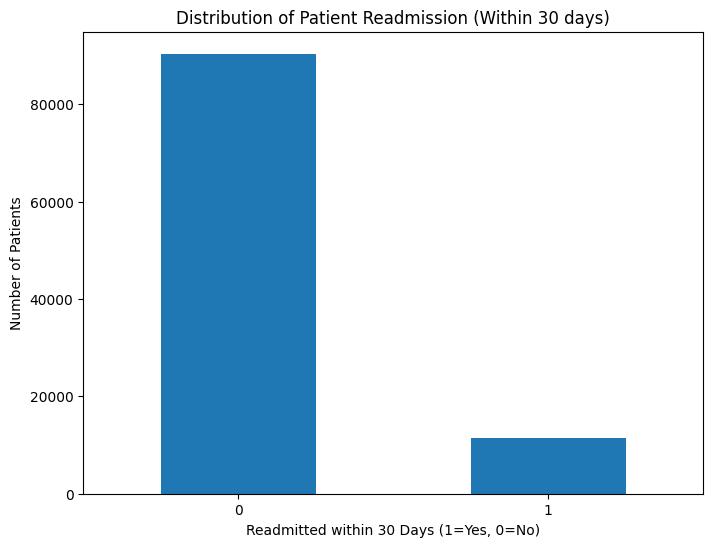

In [ ]:
# Plotting the Distribution of the Target Variable

plt.figure(figsize=(8, 6))
df_data['readmitted_30_days'].value_counts().plot(kind='bar')
plt.title('Distribution of Patient Readmission (Within 30 days)')
plt.xlabel('Readmitted within 30 Days (1=Yes, 0=No)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

This imbalance in the target vector can lead to **overfitting**. This is because the model learns more from one class than from the other.

With imbalance, should consider using *stratify* during the ***train_test_split*** and consider ***oversampling*** to prevent the model from just learning to predict the majority class.

[**Pay attention to recall, precision, and F1-score also during evaluation. Not just simple accuracy**].

### **DATA SPLITTING**

In [ ]:
# Vertical Split
X = df_data.drop(columns=['readmitted_30_days'])

y = df_data['readmitted_30_days']

In [ ]:
# Horizontal Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


***Setting up the baseline for the model***

In [ ]:
# Setting the Baseline for the Model [The Majority Class Percentage]
y_train.value_counts(normalize=True).max()

0.8883948312288115

### **CREATING THE PREPROCESSING PIPELINE**

In [ ]:
numerical_cols = [
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses'
]


categorical_cols = [
    'race',
    'gender',
    'age',
    'admission_type_id',
    'discharge_disposition_id',
    'admission_source_id',
    'diag_1',
    'diag_2',
    'diag_3',
    'max_glu_serum',
    'A1Cresult',
    'metformin',
    'repaglinide',
    'nateglinide',
    'chlorpropamide',
    'glimepiride',
    'acetohexamide',
    'glipizide',
    'glyburide',
    'tolbutamide',
    'pioglitazone',
    'rosiglitazone',
    'acarbose',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'examide',
    'citoglipton',
    'insulin',
    'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone',
    'change',
    'diabetesMed'
]

In [ ]:
# Standardize the Continuous Variables in the Dataset
continuous_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
# One-Hot Encoding the Categorical Variables in the Dataset

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['time_in_hospital', 'num_lab_procedures',
                                  'num_procedures', 'num_medications',
                                  'number_outpatient', 'number_emergency',
                                  'number_inpatient', 'number_diagnoses']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_fr...
                                  'discharge_disposition_id',
                                  'admission_source_id', 'diag_1', 'diag_2',
                                  'diag_3', 'max_glu_serum', 'A1Cresult',
                                  'm

### **MODEL TRAINING AND HYPERPARAMETER TUNING**


In [ ]:
full_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

In [ ]:
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_leaf': [1, 5, 10]
}

In [ ]:
# grid_search = GridSearchCV(
#     estimator=full_pipeline,
#     param_grid=param_grid,
#     cv=5,
#     scoring='recall',
#     n_jobs =1
# )


# grid_search.fit(X_train, y_train) Failed because of the computating power and insufficient space on collab, I guess.


# Used an Alternative (RandomizedSearchCV)
random_search = RandomizedSearchCV(
    estimator=full_pipeline,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__max_depth': [10, 20, ...], 'model__min_samples_leaf': [1, 5, ...], 'model__n_estimators': [50, 100, ...]}"
,n_iter,10
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


**MODEL EVALUATION AND INTERPRETATION**

In [ ]:
# Check for the Best Model
best_param = random_search.best_params_

best_estimator = random_search.best_estimator_

print(best_param)
print(best_estimator)

{'model__n_estimators': 150, 'model__min_samples_leaf': 10, 'model__max_depth': 10}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'num

In [ ]:
# Make Prediction
y_pred = random_search.predict(X_test)

y_pred

array([1, 0, 1, ..., 0, 0, 1], shape=(20354,))

**Evaluating the Performance of the model**

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     18083
           1       0.19      0.35      0.25      2271

    accuracy                           0.76     20354
   macro avg       0.55      0.58      0.55     20354
weighted avg       0.83      0.76      0.79     20354



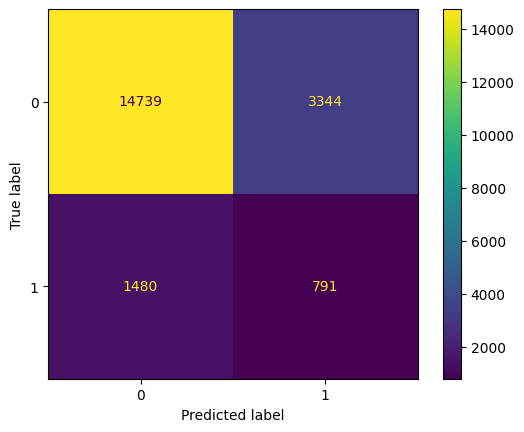

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(random_search, X_test, y_test)

In [ ]:
importances = best_estimator.named_steps['model'].feature_importances_

**SAVE MODEL**